# 平行多导线系统参数计算函数(Carson简化法计算zii 考虑集肤效应）

文件名： conductors_calc_para(r').pynb
日期： 2019.02.10
编写人： 朱明

 ## 多导线原始参数
 
 **牵引网导线架设横截面示意图**

  ![%E5%A4%8D%E7%BA%BFAT%E5%AF%BC%E7%BA%BF%E7%A9%BA%E9%97%B4%E5%88%86%E5%B8%83%E5%9B%BE.vsd.jpg](attachment:%E5%A4%8D%E7%BA%BFAT%E5%AF%BC%E7%BA%BF%E7%A9%BA%E9%97%B4%E5%88%86%E5%B8%83%E5%9B%BE.vsd.jpg)   




** 导线编号：**
 
|导线号 | 导线代码 | 导线名称 |
|:---|:---|:---|
|01|CW1|接触导线1|
|02|MW1|承力索1|
|03|PF1|正馈线1|
|04|RA1|钢轨1|
|05|RA2|钢轨2|
|06|PW1|保护线1|
|07|E1|综合地线1|
|08|CW2|接触导线2|
|09|MW2|承力索2|
|10|PF2|正馈线2|
|11|RA3|钢轨3|
|12|RA4|钢轨4|
|13|PW2|保护线2|
|14|E2|综合地线2|
  
 


** 导线架设截面坐标：**

conductors_coordinater=0.001*np.array([[0,6300],[0,7500],[-4400,8500],[-755,1000],[755,1000],[-3600,8000],[-4400,500],
                                 [5000,6300],[5000,7500],[4400+5000,8500],[4245,1000],[5755,1000],[3600+5000,8000],
                                 [4400+5000,500]],np.float64)  # 多导体坐标数组 (x,y),单位 m

** 导线计算半径：**
conductors_calc_radius=0.001*np.array([5.9,7.00,9.5,109.1,109.1,7.60,5.35,5.9,7.00,9.5,109.1,109.1,7.60,5.35])
                                    #多导体计算半径，单位 m， 计算电位系数用
** 导线等效半径：**
conductors_equivalent_radius=0.001*np.array([6.18,4.74,9.03,49.65,49.65,7.22,4.055,6.18,4.74,9.03,49.65,49.65,7.22,4.055])
                                    #多导体等效半径,单位m, 计算自电感用
** 导线直流电阻：**
conductors_resistance=np.array([0.146,0.158,0.163,0.135,0.135,0.255,0.28,0.146,0.158,0.163,0.135,0.135,0.255,0.28])
                                    #多导体直流电阻，单位 欧/km
                                    
  ** 导线电阻率：**
conductors_rho=10**-10*np.array([176.67,146.15,298.96,10405.8,10405.8,352.74,251.77,176.67,146.15,298.96,10405.8,10405.8,352.74,251.77]）计算方法：rho=RS/L（R为直流电阻，S根据导线型号查出截面半径，L=1m。单位 米）
{原始参数在软件开发前期用数组形式给出，在后阶段以数据文件的形式存储，通过读取数据生成变量。}

In [1]:
import sys 
sys.version

In [2]:
import numpy as np
import math
from scipy import linalg
from scipy import constants as C
from scipy import special

#导线定义

"""
1. 接触线（CW1）; 2.承力索（MW1）; 3.正馈线（PF1）; 4.钢轨1（RA1）;5.钢轨2（RA2）;6.保护线（PW1）;7.综合地线（E1）
8. 接触线（CW2）; 9.承力索（MW2）; 10.正馈线（PF2）; 11.钢轨3（RA3）;12.钢轨4（RA4）;13.保护线（PW2）;14.综合地线（E2）

"""
conductors_coordinater=0.001*np.array([[0,6300],[0,7500],[-4400,8500],[-755,1000],[755,1000],[-3600,8000],[-4400,500],
                                 [5000,6300],[5000,7500],[4400+5000,8500],[4245,1000],[5755,1000],[3600+5000,8000],
                                 [4400+5000,500]],np.float64)  # 多导体坐标数组 (x,y),单位 m

conductors_calc_radius=0.001*np.array([5.9,7.00,9.5,109.1,109.1,7.60,5.35,5.9,7.00,9.5,109.1,109.1,7.60,5.35])
                                    #多导体计算半径，单位 m， 计算电位系数用

conductors_equivalent_radius=0.001*np.array([4.6,4.74,9.03,49.65,49.65,7.22,4.055,4.6,4.74,9.03,49.65,49.65,7.22,4.055])
                                    #多导体等效半径,单位m, 计算自电感用


conductors_resistance=np.array([0.146,0.158,0.163,0.135,0.135,0.255,0.28,0.146,0.158,0.163,0.135,0.135,0.255,0.28])
                                    #多导体直流电阻，单位 欧/km
#conductors_rho=10**-10*np.array([159.66,243.22,462.15,50481.60,50481.60,462.72,251.77,159.66,243.22,462.15,50481.60,50481.60,462.72,251.77])、、S用πr**2的方法计算
#conductors_rho=10**-10*np.array([176.67,146.15,298.96,10405.8,10405.8,352.74,251.77,176.67,146.15,298.96,10405.8,10405.8,352.74,251.77])
conductors_rho=10**-10*np.array([55.8,54.05,28.33,2100,2100,28.33,54.05,55.8,54.05,28.33,2100,2100,28.33,54.05])
conductors_coordinater,conductors_calc_radius,conductors_equivalent_radius,conductors_resistance,conductors_rho

(array([[ 0.   ,  6.3  ],
        [ 0.   ,  7.5  ],
        [-4.4  ,  8.5  ],
        [-0.755,  1.   ],
        [ 0.755,  1.   ],
        [-3.6  ,  8.   ],
        [-4.4  ,  0.5  ],
        [ 5.   ,  6.3  ],
        [ 5.   ,  7.5  ],
        [ 9.4  ,  8.5  ],
        [ 4.245,  1.   ],
        [ 5.755,  1.   ],
        [ 8.6  ,  8.   ],
        [ 9.4  ,  0.5  ]]),
 array([0.0059 , 0.007  , 0.0095 , 0.1091 , 0.1091 , 0.0076 , 0.00535,
        0.0059 , 0.007  , 0.0095 , 0.1091 , 0.1091 , 0.0076 , 0.00535]),
 array([0.0046  , 0.00474 , 0.00903 , 0.04965 , 0.04965 , 0.00722 ,
        0.004055, 0.0046  , 0.00474 , 0.00903 , 0.04965 , 0.04965 ,
        0.00722 , 0.004055]),
 array([0.146, 0.158, 0.163, 0.135, 0.135, 0.255, 0.28 , 0.146, 0.158,
        0.163, 0.135, 0.135, 0.255, 0.28 ]),
 array([5.580e-09, 5.405e-09, 2.833e-09, 2.100e-07, 2.100e-07, 2.833e-09,
        5.405e-09, 5.580e-09, 5.405e-09, 2.833e-09, 2.100e-07, 2.100e-07,
        2.833e-09, 5.405e-09]))

## 电位系数矩阵计算
  **函数名：  calc_potential_coefficient(c_xy,r)** 
  
 * parameters:    
       1. c_xy:  2×n维数组，多导线的坐标（x,y）,单位m;  
       2. r:     1×n维数组，导线的半径,单位 m  
 * Return:
       1. P:     n×n维数组，电位系数   
 * 功能：        计算多导体的电位系数矩阵P。 
 
  计算公式：  
  
   $$ P_{ii}=\frac{1}{2\pi\epsilon}ln\frac{2h_{i}}{r_i}=18 ×10^9ln\frac{2h_{i}}{r_i}$$
   
   $$ P_{ij}=\frac{1}{2\pi\epsilon}ln\frac{D_{ij}}{d_{ij}}=18 ×10^9ln\frac{D_{ij}}{d_{ij}}  ~~~~ (i≠j) $$
   
   
   
  ![ 导体镜像截面图](/AT_calc/images/conductors_section.png "")
  
  ![conductors_section.png](attachment:conductors_section.png)
  

In [3]:
def calc_potential_coefficient(c_xy,r):
    """ 计算电位系数矩阵P
    """
  #  epsilon0=1/(36*np.pi)*10**-9         #空气介电系数
   # c_xy=conductors_coordinater          # 多导体坐标数组 (x,y),单位 m
   # R=conductors_calc_radius             #多导体计算半径，单位 m， 计算电位系数用
    n=np.shape(c_xy)[0]
    P=np.empty((n,n),np.float64)
    for i in range(n):
        for j in range(n):
            if i==j:
                P[i,i]=18*10**+9*np.log(2*c_xy[i,1]/r[i])
            else:
                Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2)
                dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]-c_xy[j,1])**2)
                P[i,j]=18*10**+9*np.log(Dij/dij)
    return P
#r=conductors_equivalent_radius
r=conductors_calc_radius
c_xy=conductors_coordinater
P=calc_potential_coefficient(c_xy,r)
print(P)

[[1.37996995e+11 4.39622466e+10 2.05883757e+10 5.67796731e+09
  5.67796731e+09 2.35691949e+10 1.91955404e+09 1.79527926e+10
  1.88802399e+10 1.07406190e+10 3.92405879e+09 3.10313444e+09
  1.15864474e+10 8.84577352e+08]
 [4.39622466e+10 1.38058116e+11 2.34405643e+10 4.77886607e+09
  4.77886607e+09 2.65792056e+10 1.78542648e+09 1.88802399e+10
  2.07232658e+10 1.21411302e+10 3.63573517e+09 3.01561698e+09
  1.29884638e+10 9.32768325e+08]
 [2.05883757e+10 2.34405643e+10 1.34814183e+11 3.58267191e+09
  3.09555510e+09 5.15304234e+10 2.12009464e+09 1.07406190e+10
  1.21411302e+10 8.30953415e+09 2.07693122e+09 1.74035222e+09
  8.62411227e+09 5.82084618e+08]
 [5.67796731e+09 4.77886607e+09 3.58267191e+09 5.23554762e+10
  9.11849942e+09 4.00493522e+09 1.24026184e+09 3.10313444e+09
  3.01561698e+09 1.74035222e+09 1.33578005e+09 8.11724179e+08
  1.89529958e+09 1.72461978e+08]
 [5.67796731e+09 4.77886607e+09 3.09555510e+09 9.11849942e+09
  5.23554762e+10 3.47240187e+09 6.47201697e+08 3.92405879e+09


In [4]:
def calc_Y(f,c_xy,r):
    P = calc_potential_coefficient(c_xy,r)
    B=linalg.inv(P)#矩阵求逆
    Y= 1j*2*np.pi*f*B
    return Y
r=conductors_calc_radius
c_xy=conductors_coordinater
f=50
Y=calc_Y(f,c_xy,r)
print('Y矩阵(×e-12) : \n {}'.format(Y*10**12))

Y矩阵(×e-12) : 
 [[0.+2.62214338e+03j 0.-7.04065188e+02j 0.-1.57141134e+02j
  0.-1.45038553e+02j 0.-1.41389466e+02j 0.-2.11997678e+02j
  0.-2.49875083e+01j 0.-1.39763073e+02j 0.-1.44838341e+02j
  0.-4.83088952e+01j 0.-7.85278871e+01j 0.-4.65049115e+01j
  0.-5.26635246e+01j 0.-5.58039650e+00j]
 [0.-7.04065188e+02j 0.+2.65512271e+03j 0.-2.08761736e+02j
  0.-8.97027505e+01j 0.-8.70419128e+01j 0.-2.69198237e+02j
  0.-1.88990495e+01j 0.-1.44838341e+02j 0.-1.79657365e+02j
  0.-6.77054258e+01j 0.-5.73768103e+01j 0.-3.85988526e+01j
  0.-7.02654966e+01j 0.-5.78843969e+00j]
 [0.-1.57141134e+02j 0.-2.08761736e+02j 0.+2.77255116e+03j
  0.-6.28645720e+01j 0.-4.04563688e+01j 0.-9.50588473e+02j
  0.-2.99270336e+01j 0.-4.83088952e+01j 0.-6.77054258e+01j
  0.-4.23855105e+01j 0.-1.95644967e+01j 0.-1.35525435e+01j
  0.-3.87492983e+01j 0.-2.67469792e+00j]
 [0.-1.45038553e+02j 0.-8.97027505e+01j 0.-6.28645720e+01j
  0.+6.22537699e+03j 0.-1.03917952e+03j 0.-7.71412895e+01j
  0.-6.57304721e+01j 0.-4.65049115e+

 
  ** 函数名: merge_potential_coefficient(P,m,k)**
 * parameters:    
       1. P:      n×n 维数组，电位系数 ;  
       2. m:      第 m 号导线（导线序号从0开始）；
       3. k:      第 k 号导线，m＜k≤n,
 * Return:
       1. P:      n-1×n-1 维数组，归并后的电位系数   
   
 * 功能：         导线k并入导线m,计算修正后的电位系数P
 
  导线k并入m公式推导：
 
 \begin{equation} 
 \begin{bmatrix}
  u_1\\
  \vdots\\
  u_m\\
  \vdots\\
  u_k\\
  \vdots\\
  u_n
  \end{bmatrix} =
  \begin{bmatrix}
  P_{11}&\dots& P_{1m}&\dots&P_{1k}&\dots&P_{1n}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
  P_{m1}&\dots& P_{mm}&\dots&P_{mk}&\dots&P_{mn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\
    P_{k1}&\dots& P_{km}&\dots&P_{kk}&\dots&P_{kn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\ 
    P_{n1}&\dots& P_{nm}&\dots&P_{nk}&\dots&P_{nn}\\
   \end{bmatrix}
   \begin{bmatrix}
   q_1\\
   \vdots\\
  q_m\\
  \vdots\\
  q_k\\
  \vdots\\
  q_n
 \end{bmatrix}
 \end{equation}

令 $q_{m}=q_{m}+q_{k}$ 有： 

\begin{equation} 
 \begin{bmatrix}
  u_1\\
  \vdots\\
  u_m\\
  \vdots\\
  u_k\\
  \vdots\\
  u_n
  \end{bmatrix} =
  \begin{bmatrix}
  P_{11}&\dots& P_{1m}&\dots&(P_{1k}-P_{1m})&\dots&P_{1n}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
  P_{m1}&\dots& P_{mm}&\dots&(P_{mk}-P_{mm})&\dots&P_{mn}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
   P_{k1}&\dots& P_{km}&\dots&(P_{kk}-P_{km})&\dots&P_{kn}\\
  \vdots& &\vdots& &\vdots& &\vdots\\ 
   P_{n1}&\dots& P_{nm}&\dots&(P_{nk}-P_{nm})&\dots&P_{nn}\\
  \end{bmatrix}
  \begin{bmatrix}
   q_1\\
   \vdots\\
  q_m+q_k\\
  \vdots\\
  q_k\\
  \vdots\\
  q_n
 \end{bmatrix}
\end{equation}   

P矩阵第k列参数发生变化，修正公式为：$$P_{ik}=P_{ik}-P_{im}$ ( i=0,1,...,n), q_m=q_m+q_k$$.

方程中，$u_{k}-u_{m}=0$,得方程

 \begin{equation*} 
 \begin{bmatrix}
  u_1\\
  \vdots\\
  u_m\\
  \vdots\\
  0\\
  \vdots\\
  u_n
  \end{bmatrix} =
  \begin{bmatrix}
  P_{11}&\dots& P_{1m}&\dots&P_{1k}&\dots&P_{1n}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
  P_{m1}&\dots& P_{mm}&\dots&P_{mk}&\dots&P_{mn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\
    P_{k1}- P_{m1}&\dots& P_{km}-P_{mm}&\dots&P_{kk}-P_{mk}&\dots&P_{kn}-P_{mn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\ 
    P_{n1}&\dots& P_{nm}&\dots&P_{nk}&\dots&P_{nn}\\
   \end{bmatrix}
   \begin{bmatrix}
   q_1\\
   \vdots\\
  q_m\\
  \vdots\\
  q_k\\
  \vdots\\
  q_n
 \end{bmatrix}
\end{equation*}

第k行等式有:
$$ 0= (P_{k1}- P_{m1})q_1+\dots+（P_{km}-P_{mm})q_m+\dots+(P_{kk}-P_{mk})q_k+\dots+(P_{kn}-P_{mn})q_n$$

可以求得：
$$q_k=-\frac{(P_{k1}- P_{m1})}{(P_{kk}-P_{mk})}q_1-\dots-\frac{(P_{km}- P_{mm})}{(P_{kk}-P_{mk})}q_m\dots-\frac{(P_{kn}- P_{mn})}{(P_{kk}-P_{mk})}q_n$$

令$K_j=\frac{P_{kj}- P_{mj}}{P_{kk}-P_{mk}}$ (j≠k)，有
$$q_k=-K_1q_1-\dots-K_m q_m-\dots-K_n q_n$$

导线电压$u_i$写成方程有：
$$u_i=P_{i1}q_1+\dots+P_{im}q_m+\dots+P_{ik}q_k+\dots+P_{in}q_n$$

把$q_k$代入方程中，得到
$$u_i=（P_{i1}-P_{ik}K_1)q_1+\dots+(P_{im}-P_{ik}K_m)q_m+\dots+(P_{in}-P_{ik}K_n)q_n$$

取(i,j=0,1,...,n; i≠k;j≠k),可以得到合并矩阵元素$P_{ij}$.
 $$P_{ij}=P_{ij}-P_{ik}K_j=P_{ij}-P_{ik}\frac{P_{kj}- P_{mj}}{P_{kk}-P_{mk}}$$

总之，导线k合并到导线m，P参数的修正步骤归纳如下：

（1）$P_{ik}=P_{ik}-P_{im}$ ( i=0,1,...,n)

（2）$P_{ij}=P_{ij}-P_{ik}K_j=P_{ij}-P_{ik}\frac{P_{kj}- P_{mj}}{P_{kk}-P_{mk}}$ （i,j=0,1,...,n; i≠k;j≠k）

（3）除P中的第k行第k列，P降n-1阶，为合并后n-1根导线的电位系数矩阵。

In [5]:
def merge_potential_coefficient(P,m,k):
    n=np.shape(P)[0]
    for i in range(n):
        P[i,k]=P[i,k]-P[i,m]
         
    for i in range(n):
        for j in range(n):
            if i!=k and j!=k:
                P[i,j]=P[i,j]-(P[k,j]-P[m,j])/(P[k,k]-P[m,k])*P[i,k]
                        
          
    E=np.empty((n-1,n-1),np.float64)
    for i in range(n):
        for j in range(n):
            if i<k:
                if j<k:
                    E[i,j]=P[i,j]
                if j>k:
                    E[i,j-1]=P[i,j]
            if i>k:
                if j<k:
                    E[i-1,j]=P[i,j]
                if j>k:
                    E[i-1,j-1]=P[i,j]
    
    return E

#测试
P=calc_potential_coefficient(conductors_coordinater,conductors_calc_radius)
# P=merge_potential_coefficient(P,0,1) 
# P=merge_potential_coefficient(P,2,3)
# P=merge_potential_coefficient(P,2,3)
# P=merge_potential_coefficient(P,2,3)
# P=merge_potential_coefficient(P,3,4)
# P=merge_potential_coefficient(P,5,6)
# P=merge_potential_coefficient(P,5,6)
# P=merge_potential_coefficient(P,5,6)
P=merge_potential_coefficient(P,0,1)
P=merge_potential_coefficient(P,6,7) 
P=merge_potential_coefficient(P,2,3)
P=merge_potential_coefficient(P,7,8) 
P=merge_potential_coefficient(P,2,3)
P=merge_potential_coefficient(P,6,7) 
P=merge_potential_coefficient(P,2,3)
P=merge_potential_coefficient(P,5,6) 
np.set_printoptions(precision=3,linewidth=214,suppress=True)
print('P矩阵 e+10 : \n {}'.format(P*10**-10))

P矩阵 e+10 : 
 [[ 8.774  1.519  0.698  1.664  0.776  0.38 ]
 [ 1.479 11.939  0.928  0.78   0.452  0.199]
 [ 0.705  0.932  2.089  0.381  0.199  0.126]
 [ 1.655  0.821  0.365  8.783  1.527  0.701]
 [ 0.768  0.478  0.189  1.485 11.945  0.933]
 [ 0.383  0.205  0.117  0.706  0.932  2.083]]


 
   
   AT牵引网络由14根导线逐步合并成6根导线：
   
  （1） 1. 接触线（CW1）+ 2.承力索（MW1）
  
  （2） 3.正馈线（PF1）
  
  （3） 4.钢轨1（RA1）+5.钢轨2（RA2）+6.保护线（PW1）+7.综合地线（E1）
  
  （4） 8. 接触线（CW2）+ 9.承力索（MW2）
  
  （5） 10.正馈线（PF2）
  
  （6） 11.钢轨3（RA3）+12.钢轨4（RA4）+13.保护线（PW2）+14.综合地线（E2）
  
   
##  电容系数矩阵计算
  函数名： calc_B(P)
  

In [6]:
def calc_B():
    """ 计算电容系数矩阵
    """
    P=calc_potential_coefficient(conductors_coordinater,conductors_calc_radius)
    P=merge_potential_coefficient(P,0,1) 
    P=merge_potential_coefficient(P,2,3)
    P=merge_potential_coefficient(P,2,3)
    P=merge_potential_coefficient(P,2,3)
    P=merge_potential_coefficient(P,3,4)
    P=merge_potential_coefficient(P,5,6)
    P=merge_potential_coefficient(P,5,6)
    P=merge_potential_coefficient(P,5,6)
    B=linalg.inv(P)
    return B
B=calc_B()
np.set_printoptions(precision=3,linewidth=214,suppress=True)              
          
print('B矩阵(×e-12) : \n {}'.format(B*10**12))

B矩阵(×e-12) : 
 [[12.291 -1.149 -3.161 -1.936 -0.367 -1.127]
 [-1.116  8.823 -3.454 -0.379 -0.136 -0.242]
 [-3.194 -3.442 50.777 -1.119 -0.235 -1.678]
 [-1.922 -0.419 -1.037 12.283 -1.166 -3.159]
 [-0.366 -0.153 -0.218 -1.119  8.819 -3.478]
 [-1.154 -0.254 -1.489 -3.21  -3.454 50.959]]


##  理想导体时电感L矩阵计算  

**函数名：calc_L(c_xy,r)**  
* Parameters:
    1. c_xy:      2×n维数组，多导线的坐标（x,y）,单位（m）;  
    2. r:         1×n维数组，导线的半径,单位(m)  
    
* Return:
    1. L:        n×n维数组，多导体和大地为理想导体时的自感$L_{ii}$和互感$L_{ij}$  
    
功能：    计算理想导体时的自感$L_{ii}$和互感$L_{ij}$  

**计算公式：**

导线回路电感 $$L_{ii}=\frac{\mu_0}{2\pi}ln\frac{2h_i}{r_i}=2×10^{-4}ln\frac{2h_i}{r_i}$$
导线回路互感 $$L_{ij}=\frac{\mu_0}{2\pi}ln\frac{D_{ij}}{d_{ij}}=2×10^{-4}ln\frac{D_{ij}}{d_{ij}}$$


In [7]:
def calc_L(c_xy,r):
    n=np.shape(c_xy)[0]
    L=np.empty((n,n),np.float64)
    for i in range(n):           #计算导线外自感和互电感
        for j in range(n):
            if i==j:
                L[i,i]=2*10**-7*np.log(2*c_xy[i,1]/r[i])
            else:
                Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2) 
                dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]-c_xy[j,1])**2)
                L[i,j]=2*10**-7*np.log(Dij/dij) 
    return L

# 函数测试
f=50
c_xy=conductors_coordinater
r=conductors_calc_radius
L=calc_L(c_xy,r)
np.set_printoptions(precision=4,linewidth=214,suppress=True) 
print('L矩阵(×e-3) : \n {}'.format(L*10**3))


L矩阵(×e-3) : 
 [[0.0015 0.0005 0.0002 0.0001 0.0001 0.0003 0.     0.0002 0.0002 0.0001 0.     0.     0.0001 0.    ]
 [0.0005 0.0015 0.0003 0.0001 0.0001 0.0003 0.     0.0002 0.0002 0.0001 0.     0.     0.0001 0.    ]
 [0.0002 0.0003 0.0015 0.     0.     0.0006 0.     0.0001 0.0001 0.0001 0.     0.     0.0001 0.    ]
 [0.0001 0.0001 0.     0.0006 0.0001 0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.0001 0.0001 0.     0.0001 0.0006 0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.0003 0.0003 0.0006 0.     0.     0.0015 0.     0.0001 0.0001 0.0001 0.     0.     0.0001 0.    ]
 [0.     0.     0.     0.     0.     0.     0.001  0.     0.     0.     0.     0.     0.     0.    ]
 [0.0002 0.0002 0.0001 0.     0.     0.0001 0.     0.0015 0.0005 0.0002 0.0001 0.0001 0.0003 0.    ]
 [0.0002 0.0002 0.0001 0.     0.     0.0001 0.     0.0005 0.0015 0.0003 0.0001 0.0001 0.0003 0.    ]
 [0.0001 0.0001 0.0001 0.     0.     0.0001 0.     0.0002 0.0003 0.0015 0.   

## 计算导线内电阻和内电感
**函数名： calc_Zc(f,R,rho)**
* Parameters:
    1. f:       频率（Hz）
    2. R:      导线半径（m）(等效半径） 
    3. rhoi     导线电阻率（Ω/m）
* Return:
    1. Rc:      导线交流电阻（Ω/m）
    2. Xc:      导线交流内电感（H/m）  
    
 功能：计算导线的交流电阻Rc和内电感Lc
 
 实心圆柱体单位长度交流内阻抗为  
 $$ Z_c=\frac{jmρJ_0(nr)}{2\pi J_1(nr)}=\frac{jmρ}{2\pi r}\frac{ber(mr)+jbei(mr)}{ber'(mr)+jbei'(mr)}$$
 式中$n=jm\sqrt j  ,m=\sqrt\frac{ωμ}{ρ}$  
 
 导线内阻一般用上述基于贝塞尔函数的公式计算，如果导线是钢轨，由于是铁磁材质，需要通过用有限元软件计算给出。

In [8]:
def calc_Zc(f,R,mu,rho):
    #n=np.shape(rho)[0]
    #m=np.empty(n,np.float64)
    #Zc=np.empty(n,np.complex128)
    #for i in range(n):
    m=np.sqrt(2*np.pi*f*mu/rho)
    A=1j*m*rho/(2*np.pi*R)
    B=special.ber(m*R)+1j*special.bei(m*R)
    C=special.berp(m*R)+1j*special.beip(m*R)
    Zc=A*B/C
    #print(m) 
    return Zc

#测试
f=50
R=conductors_equivalent_radius          # 单位 m
mu=4*np.pi*10**-7     #
rho=conductors_rho
Zc=calc_Zc(f,R,mu,rho)
print(Zc*10**3)
print(Zc.tolist())

[0.0849+0.0156j 0.0776+0.0156j 0.016 +0.0124j 0.0299+0.0149j 0.0299+0.0149j 0.0212+0.014j  0.1054+0.0156j 0.0849+0.0156j 0.0776+0.0156j 0.016 +0.0124j 0.0299+0.0149j 0.0299+0.0149j 0.0212+0.014j  0.1054+0.0156j]
[(8.491071305089507e-05+1.561720197393702e-05j), (7.76375343385756e-05+1.55991243450224e-05j), (1.5983081526977534e-05+1.2353873135476221e-05j), (2.9902426681558245e-05+1.4906918230284273e-05j), (2.9902426681558245e-05+1.4906918230284273e-05j), (2.121215356489907e-05+1.396266264474747e-05j), (0.00010541326375920289+1.564934106454878e-05j), (8.491071305089507e-05+1.561720197393702e-05j), (7.76375343385756e-05+1.55991243450224e-05j), (1.5983081526977534e-05+1.2353873135476221e-05j), (2.9902426681558245e-05+1.4906918230284273e-05j), (2.9902426681558245e-05+1.4906918230284273e-05j), (2.121215356489907e-05+1.396266264474747e-05j), (0.00010541326375920289+1.564934106454878e-05j)]


## 计算大地与导线回路电阻和电感
**函数名：calc_Zgm(f,c_xy，rou)**  
*  Parameters:
    1. f:       频率（Hz）
    2. c_xy:    2×n维数组，多导线的坐标（x,y）,单位（m）; 
    3. rou:     大地电阻率（Ω/m）
* Return:
    1. Rgm:      n×n维数组,大地与导线回路电阻（Ω/km）
    2. Xgm:      n×n维数组,大地与导线回路感抗（Ω/km）  
    
 功能：计算导线与大地的互阻抗,需要调用函数calc_Rg()，calc_Xg()



In [9]:
def calc_Zgm(f,c_xy,rou):
    n=np.shape(c_xy)[0]
    Rgm=np.empty((n,n),np.float64)
    Xgm=np.empty((n,n),np.float64)
    for i in range(n):          
        for j in range(n):
            Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2)
            xij=np.abs(c_xy[i,0]-c_xy[j,0])
            theta=np.arcsin(xij/Dij)
            k=4*np.pi*np.sqrt(5)*10**-4*Dij*np.sqrt(f/rou) 
            Rgm[i,j]=calc_Rg(f,k,theta)
            Xgm[i,j]=calc_Xg(f,k,theta)
                
    return Rgm,Xgm



def calc_Rg(f,k,theta):
       
    b1=np.sqrt(2)/6
    b2=1/16
    b3=b1/(3*5)
    b4=b2/(4*6)
    b5=-b3/(5*7)
    b6=-b4/(6*8)
    b7=-b5/(7*9)
    b8=-b6/(8*10)
    
    c2=1.3659315
    c4=c2+1/4+1/6
    c6=c4+1/6+1/8
    
    d4=np.pi/4*b4
    d6=np.pi/4*b6
    d8=np.pi/4*b8
    
    if k<5.1:
        Rg=np.pi/8
        -b1*k*np.cos(theta)
        +b1*k*np.cos(theta)
        +b2*((c2-np.log(k))*k**2*np.cos(2*theta)+theta*k**2*np.sin(2*theta))
        +b3*k**3*np.cos(3*theta)
        -d4*k**4*np.cos(4*theta)
        -b5*k**5*np.cos(5*theta)
        +b6*((c6-np.log(k))*k**2*np.cos(6*theta)+theta*k**6*np.sin(6*theta))
        +b7*np.cos(7*theta)
        -d8*k**8*np.cos(8*theta)
    else:
        Rg=np.cos(theta)/k
        -np.sqrt(2)*np.cos(2*theta)/k**2
        +np.cos(3*theta)/k**3
        +3*np.cos(5*theta)/k**5
        -45*np.cos(7*theta)
        Rg=Rg/sqrt(2)
      
    Rg=4*2*np.pi*f*10**-4*Rg
    return Rg
    
def calc_Xg(f,k,theta):
                
    b1=np.sqrt(2)/6
    b2=1/16
    b3=b1/(3*5)
    b4=b2/(4*6)
    b5=-b3/(5*7)
    b6=-b4/(6*8)
    b7=-b5/(7*9)
    b8=-b6/(8*10)
    
    c2=1.3659315
    c4=c2+1/4+1/6
    c6=c4+1/6+1/8
    c8=c4+1/8+1/10
    
    d2=np.pi/4*b2
    d4=np.pi/4*b4
    d6=np.pi/4*b6
    d8=np.pi/4*b8
    
    if k<5.1:
        Xg=0.5*(0.6159315-np.log(k))
        +b1*k*np.cos(theta)
        -d2*k*k*np.cos(2*theta)
        +b3*k**3*np.cos(3*theta)
        -b4*((c4-np.log(k))*k**4*np.cos(4*theta)+theta*k**4*np.sin(4*theta))
        +b5*k**5*np.cos(5*theta)
        -d6*k**6*np.cos(6*theta)
        +b7*k**7*np.cos(7*theta)
        -b8*((c8-np.log(k))*k**8*np.cos(8*theta)+theta*k**8*np.sin(8*theta))
    else:
        Xg=np.cos(theta)/k
        -np.cos(3*theta)/k**3
        +3*np.cos(5*theta)-45*np.cos(7*theta)
        Xg=Xg/sqrt(2)
    
    Xg=4*2*np.pi*f*10**-4*Xg
    return Xg

# 测试
f=50
rou=10**6
c_xy=conductors_coordinater
Rgm,Xgm=calc_Zgm(f,c_xy,rou)
np.set_printoptions(precision=4,linewidth=214,suppress=True)
print('Rgm 矩阵 : \n {}'.format(Rgm))
print('Xgm 矩阵 : \n {}'.format(Xgm))


Rgm 矩阵 : 
 [[0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0

In [10]:
f=2000
rou=100
c_xy=conductors_coordinater
n=np.shape(c_xy)[0]
for i in range(n):           #计算导线与大地回路电阻和电感
        for j in range(n):
            Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2)
            xij=np.abs(c_xy[i,0]-c_xy[j,0])
            theta=np.arcsin(xij/Dij)
            k=4*np.pi*np.sqrt(5)*10**-4*Dij*np.sqrt(f/rou)
            print(k)
            
            
 
            
            

0.1583362697409256
0.1734159144781566
0.1940273666973689
0.09222382683734463
0.09222382683734463
0.18530603776528737
0.10177984466181597
0.17034733950345948
0.1844476108675064
0.2203239938960755
0.10611704757157861
0.1168132022016855
0.20969277891175298
0.145791563672889
0.1734159144781566
0.1884955592153876
0.20852603742972592
0.10723468388370899
0.10723468388370899
0.19996329784837363
0.11473309708186626
0.1844476108675064
0.19869176531592203
0.23319337800406367
0.11939376439506019
0.12899367193675174
0.22275110410918417
0.15511198156428663
0.1940273666973689
0.20852603742972592
0.21362830044410597
0.1278661555227996
0.13582382184538755
0.20758868350710358
0.11309733552923257
0.2203239938960755
0.23319337800406367
0.2751547385471174
0.1614111172606516
0.17474667965698754
0.2639685721287496
0.20703643809268732
0.09222382683734463
0.10723468388370899
0.1278661555227996
0.025132741228718346
0.0314914852236045
0.11861350892715487
0.049531310617093
0.1168132022016855
0.12899367193675174
0

## 导线简化计算阻抗
** calc_z(f,c_xy,r,re,rou)** 
* Parameters:
    1. f:       频率（Hz）
    2. c_xy:    2×n维数组，多导线的坐标（x,y）,单位（m）; 
    3. r:       1×n维数组导线，等效半径（m）
    4. re       1×n维数组，导线电阻
    5. rou      大地电阻率（Ω/m）
* Return:
    1. R:      导线交流电阻（Ω/m）
    2. X:      导线交流内电感（亨/km） 
    

In [11]:
def calc_aRaL(f,r):
    #a=np.shape(r)[0]
  
    #aR=np.empty((a,b),np.float64)
    #aL=np.empty((a,b),np.float64)
    #m=np.empty((a,b),np.float64)
    #for i in range(a):
    m=np.sqrt(2*np.pi*f*mu/rho)
    A1=m*r/2
    A2=4/(m*r)
    B1=special.ber(m*r)
    B2=special.bei(m*r)
    C1=special.berp(m*r)
    C2=special.beip(m*r)
    aR=A1*((B1*C2-C1*B2)/(C1**2+C2**2))
    aL=A2*((B2*C2+C1*B1)/(C1**2+C2**2))
    return aR,aL
f=50
r=conductors_calc_radius
aR,aL=calc_aRaL(f,r)
print(aR)
print(aL)

[1.0308 1.0634 1.509  1.9463 1.9463 1.2672 1.0224 1.0308 1.0634 1.509  1.9463 1.9463 1.2672 1.0224]
[0.9846 0.9685 0.758  0.5868 0.5868 0.8692 0.9888 0.9846 0.9685 0.758  0.5868 0.5868 0.8692 0.9888]


In [12]:
def calc_z(f,c_xy,r,Re,rou):
    n=np.shape(c_xy)[0]
    R=np.empty((n,n),np.float64)
    X=np.empty((n,n),np.float64)
    z=np.empty((n,n),np.complex128)
    aR,aL=calc_aRaL(f,r)
    rp=(math.e*r)**(-aL/4)
    Rg=np.pi**2*f*10**-4
    Dg=660*np.sqrt(rou/f)
    for i in range(n):           #
        for j in range(n):
            if i==j:
                R[i,j]=Rg+Re[i]
                X[i,j]=2*2*np.pi*f*10**-4*np.log(Dg/rp[i])#rp为几何半径
            else:
                dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]-c_xy[j,1])**2)
                R[i,j]=Rg
                X[i,j]=2*2*np.pi*f*10**-4*np.log(Dg/dij)
    z=R+1j*X        
    return R,X,z
# 测试该函数
f=50
c_xy=conductors_coordinater
#r=conductors_equivalent_radius
rd=conductors_resistance
Re=rd*aR
rou=100
R,X,z=calc_z(f,c_xy,r,Re,rou)
np.set_printoptions(precision=4,linewidth=214,suppress=True)
print('R 矩阵 : \n {}'.format(R))
print('X 矩阵 : \n {}'.format(X))
print('z 矩阵 : \n {}'.format(z))

R 矩阵 : 
 [[0.1998 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.2174 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.2953 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.3121 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.3121 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.3725 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.3356 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.1998 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.2174 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.2953 0.0493 0.0

# 5 阻抗矩阵合并

** 函数名：merge_z(z,i,j)**
* parameters:    
       1. z:      n×n 维数组，阻抗矩阵 ;  
       2. m:      第 m 号导线（导线序号从0开始）；
       3. k:      第 k 号导线，m＜k≤n,
 * Return:
       1. z:      n-1×n-1 维数组，归并后的电位系数  
       
功能： 导线j并入导线i, i＜j≤n, n为z的阶，输出合并阻抗矩阵z,z降一阶




   AT牵引网络由14根导线逐步合并成6根导线：
   
  （1） 1. 接触线（CW1）+ 2.承力索（MW1）
  
  （2） 3.正馈线（PF1）
  
  （3） 4.钢轨1（RA1）+5.钢轨2（RA2）+6.保护线（PW1）+7.综合地线（E1）
  
  （4） 8. 接触线（CW2）+ 9.承力索（MW2）
  
  （5） 10.正馈线（PF2）
  
  （6） 11.钢轨3（RA3）+12.钢轨4（RA4）+13.保护线（PW2）+14.综合地线（E2） 
 

In [13]:
def merge_z(z,m,k):
    P=z
    n=np.shape(P)[0]
    for i in range(n):
        P[i,k]=P[i,k]-P[i,m]
         
    for i in range(n):
        for j in range(n):
            if i!=k or j!=k:
                P[i,j]=P[i,j]-(P[k,j]-P[m,j])/(P[k,k]-P[m,k])*P[i,k]
                               
            
    E=np.empty((n-1,n-1),np.complex128)
    for i in range(n):
        for j in range(n):
            if i<k:
                if j<k:
                    E[i,j]=P[i,j]
                if j>k:
                    E[i,j-1]=P[i,j]
            if i>k:
                if j<k:
                    E[i-1,j]=P[i,j]
                if j>k:
                    E[i-1,j-1]=P[i,j]
    
    return E

# 测试
#f=50
c_xy=conductors_coordinater
re=conductors_resistance
rou=100
R,X,z=calc_z(f,c_xy,r,re,rou)

z=merge_z(z,0,1) 
z=merge_z(z,2,3)
z=merge_z(z,2,3)
z=merge_z(z,2,3)
z=merge_z(z,3,4)
z=merge_z(z,5,6)
z=merge_z(z,5,6)
z=merge_z(z,5,6)
Z=np.abs(z)
np.set_printoptions(precision=4,linewidth=214,suppress=True)              
print('阻抗矩阵z （Ω/km）: \n {}'.format(z))
print('阻抗矩阵Z （Ω/km）: \n {}'.format(Z))

阻抗矩阵z （Ω/km）: 
 [[0.1298+0.3919j 0.0594+0.3274j 0.0508+0.3236j 0.0504+0.3277j 0.0482+0.2902j 0.0524+0.2966j]
 [0.0594+0.3274j 0.2621+0.3646j 0.0338+0.3288j 0.0503+0.2878j 0.0496+0.2663j 0.0511+0.2685j]
 [0.0508+0.3236j 0.0338+0.3288j 0.1093+0.357j  0.0489+0.2977j 0.0376+0.2791j 0.0568+0.3013j]
 [0.0504+0.3277j 0.0503+0.2878j 0.0489+0.2977j 0.1279+0.3924j 0.0581+0.3275j 0.0485+0.3251j]
 [0.0482+0.2902j 0.0496+0.2663j 0.0376+0.2791j 0.0581+0.3275j 0.2605+0.3638j 0.0332+0.3307j]
 [0.0524+0.2966j 0.0511+0.2685j 0.0568+0.3013j 0.0485+0.3251j 0.0332+0.3307j 0.1041+0.3524j]]
阻抗矩阵Z （Ω/km）: 
 [[0.4128 0.3327 0.3275 0.3316 0.2942 0.3012]
 [0.3327 0.449  0.3305 0.2922 0.2709 0.2734]
 [0.3275 0.3305 0.3734 0.3017 0.2816 0.3066]
 [0.3316 0.2922 0.3017 0.4127 0.3326 0.3287]
 [0.2942 0.2709 0.2816 0.3326 0.4474 0.3324]
 [0.3012 0.2734 0.3066 0.3287 0.3324 0.3675]]


# '''阻抗归并
# 归并1：PW2保护线2，RR2钢轨2右，RL2钢轨2左，CGW2综合地线2，四根导线归并为1根
# 第一步：行归并'''
Pm1=z.copy()
Pm1[:,13]=Pm1[:,13]-Pm1[:,10]
Pm1[:,12]=Pm1[:,12]-Pm1[:,10]
Pm1[:,11]=Pm1[:,11]-Pm1[:,10]
# '''第二步：列归并'''
Pm1[13,:]=Pm1[13,:]-Pm1[10,:]
Pm1[12,:]=Pm1[12,:]-Pm1[10,:]
Pm1[11,:]=Pm1[11,:]-Pm1[10,:]
# '''分块'''
PLL1=np.mat(Pm1[0:11,0:11])
PLT1=np.mat(Pm1[0:11,11:14])
PTL1=np.mat(Pm1[11:14,0:11])
PTT1=np.mat(Pm1[11:14,11:14])
# print(np.shape(PTT1))
# print(np.shape(PTL1))
print(np.shape(PLT1))
print(np.shape(PLL1))
#p11 = np.linalg.inv(PTT1)
#print('P11:',P11.shape,P11.type)
#print('PLT1:',PLT1.shape)
# p22 = PLT1*p11
#p22 = PLT1*p11
#print('p22:',p22.shape)
Pm2=PLL1-PLT1*np.linalg.inv(PTT1)*PTL1

# '''归并2：MW2承力索2，CW2接触线2，两根导线归并为1根
# 第一步'''
Pm2[:,8]=Pm2[:,8]-Pm2[:,7]
# '''第二步'''
Pm2[8,:]=Pm2[8,:]-Pm2[7,:]
# '''分块'''
PLL2u=np.mat(np.hstack((Pm2[0:8,0:8],Pm2[0:8,9:11])))
PLL2d=np.mat(np.hstack((Pm2[9:11,0:8],Pm2[9:11,9:11])))
PLL2=np.mat(np.vstack((PLL2u,PLL2d)))
#PLT2=Pm2[[0:7,9:10],8]
PLT2=np.mat(np.vstack((Pm2[0:8,8],Pm2[9:11,8])))
#PTL2=Pm2[8,[0:7,9:10]]
PTL2=np.mat(np.hstack((Pm2[8,0:8],Pm2[8,9:11])))
PTT2=np.mat(Pm2[8,8])
Pm3=PLL2-PLT2*np.linalg.inv(PTT2)*PTL2#第二次合并完成（10×10）

# '''归并3：PW1保护线1，RR1钢轨1右，RL1钢轨1左，CGW1综合地线1，四根导线归并为1根
# 第一步'''
Pm3[:,4]=Pm3[:,4]-Pm3[:,3]
Pm3[:,5]=Pm3[:,5]-Pm3[:,3]
Pm3[:,6]=Pm3[:,6]-Pm3[:,3]
#第二步
Pm3[4,:]=Pm3[4,:]-Pm3[3,:]
Pm3[5,:]=Pm3[5,:]-Pm3[3,:]
Pm3[6,:]=Pm3[6,:]-Pm3[3,:]
#分块
PLL3u=np.mat(np.hstack((Pm3[0:4,0:4],Pm3[0:4,7:10])))
PLL3d=np.mat(np.hstack((Pm3[7:10,0:4],Pm3[7:10,7:10])))
PLL3=np.mat(np.vstack((PLL3u,PLL3d)))
PLT3=np.mat(np.vstack((Pm3[0:4,4:7],Pm3[7:10,4:7])))
PTL3=np.mat(np.hstack((Pm3[4:7,0:4],Pm3[4:7,7:10])))
PTT3=np.mat(Pm3[4:7,4:7])
Pm4=PLL3-PLT3*np.linalg.inv(PTT3)*PTL3#第三次合并完成（7×7）

# '''归并4：MW1承力索1，CW1接触线1，两根导线归并为1根
# 第一步'''
Pm4[:,1]=Pm4[:,1]-Pm4[:,0]
# '''第二步'''
Pm4[1,:]=Pm4[1,:]-Pm4[0,:]
type(Pm4[0,2:7])
# '''分块'''
PLL4u=np.mat(np.hstack((np.mat(Pm4[0,0]),Pm4[0,2:7])))

PLL4d=np.mat(np.hstack((Pm4[2:7,0],Pm4[2:7,2:7])))
PLL4=np.mat(np.vstack((PLL4u,PLL4d)))
PLT4=np.mat(np.vstack((np.mat(Pm4[0,1]),Pm4[2:7,1])))
PTL4=np.mat(np.hstack((np.mat(Pm4[1,0]),Pm4[1,2:7])))
PTT4=np.mat(Pm4[1,1])
Pm=PLL4-PLT4*np.linalg.inv(PTT4)*PTL4#第二次合并完成（6×6）
print(Pm)

## 频率变化对aR的影响

In [14]:
x1=np.arange(1,20000,10)
#x1=np.logspace(0,5)
#print(x1)

In [15]:
def calc_aRaLch(fch):
    a=np.shape(fch)[0]
    b=np.shape(rho)[0]
    aRch=np.empty((a,b),np.float64)
    aLch=np.empty((a,b),np.float64)
    m=np.empty((a,b),np.float64)
    for i in range(a):
        for j in range(b):
            m[i,j]=np.sqrt(2*np.pi*fch[i]*mu/rho[j])
    A1=m*r/2
    A2=4/(m*r)
    B1=special.ber(m*r)
    B2=special.bei(m*r)
    C1=special.berp(m*r)
    C2=special.beip(m*r)
    aRch=A1*((B1*C2-C1*B2)/(C1**2+C2**2))
    aLch=A2*((B2*C2+C1*B1)/(C1**2+C2**2))
    return aRch,aLch

In [16]:
r=conductors_equivalent_radius
fch=x1
aRch,aLch=calc_aRaLch(fch)
print(aRch)
print(aLch)

[[ 1.      1.      1.0003 ...  1.      1.0001  1.    ]
 [ 1.0006  1.0007  1.0317 ...  1.0054  1.0132  1.0004]
 [ 1.0021  1.0025  1.1084 ...  1.0194  1.0467  1.0013]
 ...
 [ 8.9009  9.3069 24.0705 ... 15.4641 19.2967  7.9996]
 [ 8.9031  9.3091 24.0764 ... 15.4679 19.3015  8.0016]
 [ 8.9052  9.3114 24.0824 ... 15.4717 19.3062  8.0035]]
[[1.     1.     0.9999 ... 1.     0.9999 1.    ]
 [0.9997 0.9997 0.9842 ... 0.9973 0.9934 0.9998]
 [0.999  0.9988 0.9462 ... 0.9903 0.9767 0.9993]
 ...
 [0.1156 0.1104 0.042  ... 0.0657 0.0525 0.129 ]
 [0.1156 0.1104 0.042  ... 0.0657 0.0525 0.129 ]
 [0.1155 0.1104 0.042  ... 0.0657 0.0525 0.129 ]]


* 绘图

In [17]:
import matplotlib.pyplot as plt
x=x1
y1=aRch[:,0]
y2=aRch[:,1]
y3=aRch[:,2]
y4=aRch[:,3]
y5=aRch[:,4]
y6=aRch[:,5]
y7=aRch[:,6]
y8=aRch[:,7]
y9=aRch[:,8]
y10=aRch[:,9]
y11=aRch[:,10]
y12=aRch[:,11]
y13=aRch[:,12]
y14=aRch[:,13]

plt.xlabel('f Hz')
plt.ylabel('aR')
plt.title('The influence of f on aR')
plt.plot(x,y1)
plt.plot(x,y2,color='red')
plt.plot(x,y3,color='green')
plt.plot(x,y4,color='blue')
plt.plot(x,y5,color='yellow')
plt.plot(x,y6,color='gray')
plt.plot(x,y7,color='orange')
plt.plot(x,y8)
plt.plot(x,y9,color='red')
plt.plot(x,y10,color='green')
plt.plot(x,y11,color='blue')
plt.plot(x,y12,color='yellow')
plt.plot(x,y13,color='gray')
plt.plot(x,y14,color='orange')
plt.show()

<Figure size 640x480 with 1 Axes>

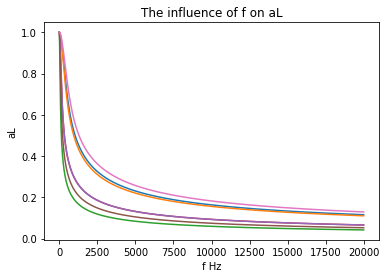

In [18]:
y1=aLch[:,0]
y2=aLch[:,1]
y3=aLch[:,2]
y4=aLch[:,3]
y5=aLch[:,4]
y6=aLch[:,5]
y7=aLch[:,6]

plt.xlabel('f Hz')
plt.ylabel('aL')
plt.title('The influence of f on aL')
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)
plt.plot(x,y6)
plt.plot(x,y7)
plt.show()

## 频率变化对阻抗的影响

In [19]:
def calc_fch(fch):
    a=np.shape(fch)[0]
    b=np.shape(Z)[0]#H矩阵的列数，6
    H=np.empty((a,b),np.complex128)
    Lch=np.empty((a,b),np.float64)

    for i in range(a):
        for j in range(b):
            R,X,z=calc_z(fch[i],c_xy,r,re,rou)
            z=merge_z(z,0,1) 
            z=merge_z(z,2,3)
            z=merge_z(z,2,3)
            z=merge_z(z,2,3)
            z=merge_z(z,3,4)
            z=merge_z(z,5,6)
            z=merge_z(z,5,6)
            z=merge_z(z,5,6)
            H[i][j]=z[j][j]
    Zch=np.abs(H)
    Rch=np.real(H)
    Xch=np.imag(H)

    for i in range(a):
        for j in range(b):
            w=2*np.pi*fch[i]
            Lch[i][j]=Xch[i][j]/w
    return H,Rch,Lch,Xch,Zch
fch=x1
H,Rch,Lch,Xch,Zch=calc_fch(fch)
print('H 矩阵 : \n {}'.format(H))
print('Lch 矩阵 : \n {}'.format(Lch))
print('Rch矩阵 : \n {}'.format(Rch))
print('Xch矩阵 : \n {}'.format(Xch))
print('Zch矩阵 : \n {}'.format(Zch))


H 矩阵 : 
 [[ 0.0769 +0.0103j  0.164  +0.0099j  0.0458 +0.0097j  0.0769 +0.0103j  0.164  +0.0099j  0.0458 +0.0095j]
 [ 0.087  +0.0962j  0.1769 +0.0921j  0.0566 +0.0899j  0.0869 +0.0962j  0.1768 +0.0921j  0.0563 +0.0884j]
 [ 0.0975 +0.175j   0.1944 +0.1669j  0.0687 +0.1626j  0.0971 +0.1751j  0.1942 +0.1667j  0.0675 +0.1599j]
 ...
 [19.8658+85.999j  20.2592+43.8126j 20.0505+59.8913j 19.8089+89.5625j 20.1107+51.9092j 19.7714+64.8735j]
 [19.8757+86.0364j 20.269 +43.8293j 20.0601+59.9164j 19.8187+89.6015j 20.1205+51.9296j 19.7813+64.8998j]
 [19.8855+86.0738j 20.2789+43.846j  20.0698+59.9414j 19.8286+89.6405j 20.1304+51.95j   19.7912+64.9261j]]
Lch 矩阵 : 
 [[0.0016 0.0016 0.0015 0.0016 0.0016 0.0015]
 [0.0014 0.0013 0.0013 0.0014 0.0013 0.0013]
 [0.0013 0.0013 0.0012 0.0013 0.0013 0.0012]
 ...
 [0.0007 0.0003 0.0005 0.0007 0.0004 0.0005]
 [0.0007 0.0003 0.0005 0.0007 0.0004 0.0005]
 [0.0007 0.0003 0.0005 0.0007 0.0004 0.0005]]
Rch矩阵 : 
 [[ 0.0769  0.164   0.0458  0.0769  0.164   0.0458]
 [ 0.08

* f对R的影响

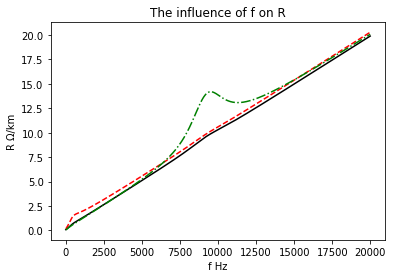

In [20]:
import matplotlib.pyplot as plt
def draw_R(fch):
    x=fch
    y1=Rch[:,0]
    y2=Rch[:,1]
    y3=Rch[:,2]
    y4=Rch[:,3]
    y5=Rch[:,4]
    y6=Rch[:,5]
    #my_x_ticks = np.arange(0, 100, 10)

    plt.xlabel('f Hz')
    plt.ylabel('R Ω/km')
    plt.title('The influence of f on R')


    #my_x_ticks=np.arange(0,100000,1000)
    #my_y_ticks=np.arange(0,1.5,0.1)
    #plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)
    plt.rcParams['figure.figsize']=(8.0,4.0)


    R1=plt.plot(x,y1,color='black')
    R2=plt.plot(x,y2,color='red',ls='--')
    R3=plt.plot(x,y3,color='green',ls='-.')
#     R4=plt.plot(x,y4,color='blue')
#     R5=plt.plot(x,y5,color='orange')
#     R6=plt.plot(x,y6,color='purple')
#    return R1,R2,R3,R4,R5,R6
    return R1,R2,R3
    #plt.figure(figsize=(1, 8)) 
x=x1
R1,R2,R3=draw_R(fch)
#R1,R2,R3,R4,R5,R6=draw_R(fch)
plt.show()

* f对L的影响

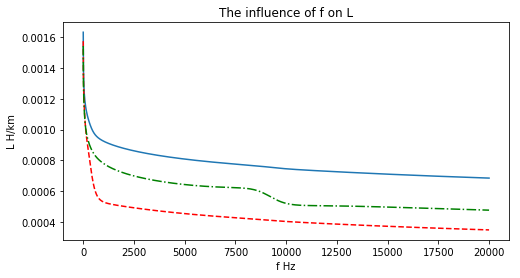

In [21]:
def draw_L(fch):
    x=fch
    y1=Lch[:,0]
    y2=Lch[:,1]
    y3=Lch[:,2]
    y4=Lch[:,3]
    y5=Lch[:,4]
    y6=Lch[:,5]

    plt.xlabel('f Hz')
    plt.ylabel('L H/km')
    plt.title('The influence of f on L')

    L1=plt.plot(x,y1)
    L2=plt.plot(x,y2,color='red',ls='--')
    L3=plt.plot(x,y3,color='green',ls='-.')
#     L4=plt.plot(x,y4,color='blue')
#     L5=plt.plot(x,y5,color='orange',ls='--')
#     L6=plt.plot(x,y6,color='purple',ls='-.')
    #Legend=plt.legend(handles = [L1,L2,L3], labels = ['L1''L2','L3'])
#    return L1,L2,L3,L4,L5,L6
    return L1,L2,L3
x=x1
L1,L2,L3=draw_L(fch)
plt.show()


    f对X的影响



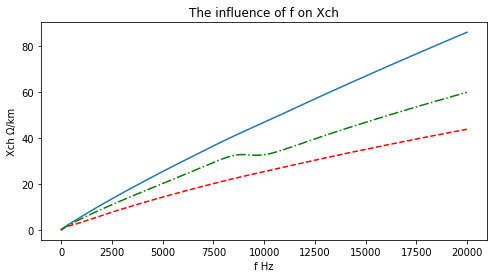

In [22]:
def draw_X(fch):
    x=fch
    y1=Xch[:,0]
    y2=Xch[:,1]
    y3=Xch[:,2]
    y4=Xch[:,3]
    y5=Xch[:,4]
    y6=Xch[:,5]

    plt.xlabel('f Hz')
    plt.ylabel('Xch Ω/km')
    plt.title('The influence of f on Xch')
    X1=plt.plot(x,y1)
    X2=plt.plot(x,y2,color='red',ls='--')
    X3=plt.plot(x,y3,color='green',ls='-.')
#     X4=plt.plot(x,y4,color='blue')
#     X5=plt.plot(x,y5,color='orange',ls='--')
#     X6=plt.plot(x,y6,color='purple',ls='-.')
#    return X1,X2,X3,X4,X5,X6
    return X1,X2,X3
x1=fch
X1,X2,X3=draw_X(fch)
plt.show()

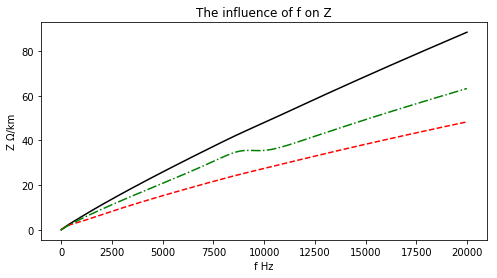

In [23]:
def draw_Z(fch):
    x=fch
    y1=Zch[:,0]
    y2=Zch[:,1]
    y3=Zch[:,2]
    y4=Zch[:,3]
    y5=Zch[:,4]
    y6=Zch[:,5]
    #my_x_ticks = np.arange(0, 100, 10)

    plt.xlabel('f Hz')
    plt.ylabel('Z Ω/km')
    plt.title('The influence of f on Z')


    #my_x_ticks=np.arange(0,100000,1000)
    #my_y_ticks=np.arange(0,1.5,0.1)
    #plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)
    plt.rcParams['figure.figsize']=(8.0,4.0)


    Z1=plt.plot(x,y1,color='black')
    Z2=plt.plot(x,y2,color='red',ls='--')
    Z3=plt.plot(x,y3,color='green',ls='-.')
#     R4=plt.plot(x,y4,color='blue')
#     R5=plt.plot(x,y5,color='orange')
#     R6=plt.plot(x,y6,color='purple')
#    return R1,R2,R3,R4,R5,R6
    return Z1,Z2,Z3
    #plt.figure(figsize=(1, 8)) 
x=x1
Z1,Z2,Z3=draw_Z(fch)
#R1,R2,R3,R4,R5,R6=draw_R(fch)
plt.show()

## 6. 导线复杂计算阻抗 ##
** calc_z1(f,c_xy,r,re,rou) **
* Parameters:
    1. f:       频率（Hz）
    2. c_xy:     2×n维数组，多导线的坐标（x,y）,单位（m）; 
    3. r:       1×n维数组导线，等效半径（m）
    4. re       1×n维数组，导线电阻
    5. rou      大地电阻率（Ω/m）
    6. rho     导线电阻率（Ω/m）
    7. L:       n×n维数组，理想导体时的电感
    8. Zc：      1×n维数组，导线内电阻和内电感（Ω/km）
    9. Zg：      n×n维数组，大地内阻抗（Ω/km）  
* Return:
     z1 :      n×n维数组，复杂方法计算得到的阻抗矩阵（Ω/km）
    

In [24]:
def calc_z1(c_xy,r,f,rou):
    n=np.shape(c_xy)[0]
    z1=np.empty((n,n),np.complex128)
    L=calc_L(c_xy,r)
    aR,aL=calc_aRaL(f,r)
    for i in range(n):
        for j in range(n):
            Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2)
            xij=np.abs(c_xy[i,0]-c_xy[j,0])
            theta=np.arcsin(xij/Dij)
            k=4*np.pi*np.sqrt(5)*10**-4*Dij*np.sqrt(f/rou)
            Rg=calc_Rg(f,k,theta)
            Xg=calc_Xg(f,k,theta)
            if i==j:
                z1[i,i]=1j*2*np.pi*f*L[i,i]+aR[i]*rd[i]+1j*np.pi*f*10**-7*aL[i]+Rg+1j*Xg
            else:
                z1[i,j]=1j*2*np.pi*f*L[i,j]+Rg+1j*Xg
    return z1
    
f=50
rou=100
rd=conductors_resistance
c_xy=conductors_coordinater
z1=calc_z1(c_xy,r,f,rou)
print(z1)

[[0.197 +0.2709j 0.0493+0.2648j 0.0493+0.2577j 0.0493+0.3044j 0.0493+0.3044j 0.0493+0.2606j 0.0493+0.2982j 0.0493+0.2659j 0.0493+0.2609j 0.0493+0.2497j 0.0493+0.2955j 0.0493+0.2895j 0.0493+0.2528j 0.0493+0.2756j]
 [0.0493+0.2648j 0.2095+0.26j   0.0493+0.2532j 0.0493+0.2949j 0.0493+0.2949j 0.0493+0.2558j 0.0493+0.2906j 0.0493+0.2609j 0.0493+0.2562j 0.0493+0.2461j 0.0493+0.2881j 0.0493+0.2833j 0.0493+0.249j  0.0493+0.2717j]
 [0.0493+0.2577j 0.0493+0.2532j 0.2849+0.2521j 0.0493+0.2838j 0.0493+0.28j   0.0493+0.2536j 0.0493+0.2915j 0.0493+0.2497j 0.0493+0.2461j 0.0493+0.2357j 0.0493+0.2692j 0.0493+0.2642j 0.0493+0.2383j 0.0493+0.2535j]
 [0.0493+0.3044j 0.0493+0.2949j 0.0493+0.2838j 0.1982+0.3863j 0.0493+0.3719j 0.0493+0.2886j 0.0493+0.3434j 0.0493+0.2895j 0.0493+0.2833j 0.0493+0.2642j 0.0493+0.3238j 0.0493+0.3091j 0.0493+0.2685j 0.0493+0.2833j]
 [0.0493+0.3044j 0.0493+0.2949j 0.0493+0.28j   0.0493+0.3719j 0.1982+0.3863j 0.0493+0.2849j 0.0493+0.324j  0.0493+0.2955j 0.0493+0.2881j 0.0493+0.26

In [25]:
print(z1)
z1=merge_z(z1,0,1) 
z1=merge_z(z1,2,3)
z1=merge_z(z1,2,3)
z1=merge_z(z1,2,3)
z1=merge_z(z1,3,4)
z1=merge_z(z1,5,6)
z1=merge_z(z1,5,6)
z1=merge_z(z1,5,6)

Z1=np.abs(z1)
#z1m=z1
np.set_printoptions(precision=4,linewidth=214,suppress=True)              
print('阻抗矩阵z1m（Ω/km）: \n {}'.format(z1))
print('阻抗矩阵模Z1m（Ω/km）: \n {}'.format(Z1))

[[0.197 +0.2709j 0.0493+0.2648j 0.0493+0.2577j 0.0493+0.3044j 0.0493+0.3044j 0.0493+0.2606j 0.0493+0.2982j 0.0493+0.2659j 0.0493+0.2609j 0.0493+0.2497j 0.0493+0.2955j 0.0493+0.2895j 0.0493+0.2528j 0.0493+0.2756j]
 [0.0493+0.2648j 0.2095+0.26j   0.0493+0.2532j 0.0493+0.2949j 0.0493+0.2949j 0.0493+0.2558j 0.0493+0.2906j 0.0493+0.2609j 0.0493+0.2562j 0.0493+0.2461j 0.0493+0.2881j 0.0493+0.2833j 0.0493+0.249j  0.0493+0.2717j]
 [0.0493+0.2577j 0.0493+0.2532j 0.2849+0.2521j 0.0493+0.2838j 0.0493+0.28j   0.0493+0.2536j 0.0493+0.2915j 0.0493+0.2497j 0.0493+0.2461j 0.0493+0.2357j 0.0493+0.2692j 0.0493+0.2642j 0.0493+0.2383j 0.0493+0.2535j]
 [0.0493+0.3044j 0.0493+0.2949j 0.0493+0.2838j 0.1982+0.3863j 0.0493+0.3719j 0.0493+0.2886j 0.0493+0.3434j 0.0493+0.2895j 0.0493+0.2833j 0.0493+0.2642j 0.0493+0.3238j 0.0493+0.3091j 0.0493+0.2685j 0.0493+0.2833j]
 [0.0493+0.3044j 0.0493+0.2949j 0.0493+0.28j   0.0493+0.3719j 0.1982+0.3863j 0.0493+0.2849j 0.0493+0.324j  0.0493+0.2955j 0.0493+0.2881j 0.0493+0.26

## 频率变化对复杂方法阻抗矩阵的影响

In [26]:

def calc_fch1(fch):
    a=np.shape(fch)[0]
    b=np.shape(Z1)[0]#H矩阵的列数，6
    H1=np.empty((a,b),np.complex64)
    Lch1=np.empty((a,b),np.float64)

    for i in range(a):
        for j in range(b):
            z1=calc_z1(c_xy,r,fch[i],rou)
            z1=merge_z(z1,0,1) 
            z1=merge_z(z1,2,3)
            z1=merge_z(z1,2,3)
            z1=merge_z(z1,2,3)
            z1=merge_z(z1,3,4)
            z1=merge_z(z1,5,6)
            z1=merge_z(z1,5,6)
            z1=merge_z(z1,5,6)
#             z1=merge_z(z1,0,1) 
#             z1=merge_z(z1,6,7)
#             z1=merge_z(z1,2,3)
#             z1=merge_z(z1,7,8)
#             z1=merge_z(z1,2,3)
#             z1=merge_z(z1,6,7)
#             z1=merge_z(z1,2,3)
#             z1=merge_z(z1,5,6)
            H1[i][j]=z1[j][j]
    Zch1=np.abs(H1)
    Rch1=np.real(H1)
    Xch1=np.imag(H1)

    for i in range(a):
        for j in range(b):
            w=2*np.pi*fch[i]
            Lch1[i][j]=Xch1[i][j]/w
    return H1,Rch1,Lch1,Xch1,Zch1
fch=x1
aRch,aLch=calc_aRaLch(fch)
aR=aRch
aL=aLch
H1,Rch1,Lch1,Xch1,Zch1=calc_fch1(fch)

# H1=np.nan_to_num(H1)
# Rch1=np.nan_to_num(Rch1)
# Lch1=np.nan_to_num(Lch1)
# Xch1=np.nan_to_num(Xch1)
# Zch1=np.nan_to_num(Zch1)
print('H 矩阵 : \n {}'.format(H1))
print('Lch 矩阵 : \n {}'.format(Lch1))
print('Rch矩阵 : \n {}'.format(Rch1))
print('Xch矩阵 : \n {}'.format(Xch1))
print('Zch矩阵 : \n {}'.format(Zch1))


H 矩阵 : 
 [[  0.0769 +0.0078j   0.164  +0.0075j   0.0458 +0.0094j   0.0769 +0.0078j   0.164  +0.0075j   0.0458 +0.0093j]
 [  0.0873 +0.0688j   0.1793 +0.0659j   0.0571 +0.0865j   0.0871 +0.0688j   0.1792 +0.0659j   0.0566 +0.0852j]
 [  0.0987 +0.1227j   0.2024 +0.1173j   0.0705 +0.1566j   0.0978 +0.1228j   0.202  +0.1173j   0.0689 +0.1542j]
 ...
 [ 69.4983+34.4414j  56.2156+33.0664j 119.2588+97.3573j  51.8604 +9.908j   45.2039+10.6157j  88.4867+15.8958j]
 [ 69.5387+34.4548j  56.2465+33.0801j 119.3298+97.414j   51.8894 +9.8994j  45.2275+10.6096j  88.5372+15.8814j]
 [ 69.5791+34.4682j  56.2774+33.0937j 119.4008+97.4708j  51.9183 +9.8909j  45.2511+10.6035j  88.5877+15.8669j]]
Lch 矩阵 : 
 [[0.0012 0.0012 0.0015 0.0012 0.0012 0.0015]
 [0.001  0.001  0.0013 0.001  0.001  0.0012]
 [0.0009 0.0009 0.0012 0.0009 0.0009 0.0012]
 ...
 [0.0003 0.0003 0.0008 0.0001 0.0001 0.0001]
 [0.0003 0.0003 0.0008 0.0001 0.0001 0.0001]
 [0.0003 0.0003 0.0008 0.0001 0.0001 0.0001]]
Rch矩阵 : 
 [[  0.0769   0.164    

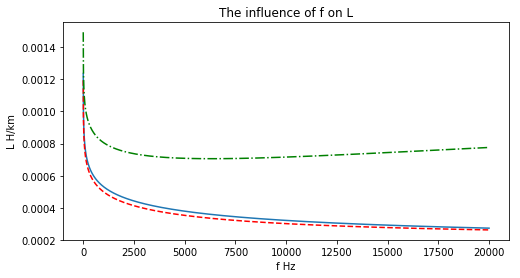

In [27]:
def draw_L(fch):
    x=fch
    y1=Lch1[:,0]
    y2=Lch1[:,1]
    y3=Lch1[:,2]
    y4=Lch1[:,3]
    y5=Lch1[:,4]
    y6=Lch1[:,5]

    plt.xlabel('f Hz')
    plt.ylabel('L H/km')
    plt.title('The influence of f on L')

    L1=plt.plot(x,y1)
    L2=plt.plot(x,y2,color='red',ls='--')
    L3=plt.plot(x,y3,color='green',ls='-.')
#     L4=plt.plot(x,y4,color='blue')
#     L5=plt.plot(x,y5,color='orange',ls='--')
#     L6=plt.plot(x,y6,color='purple',ls='-.')
    #Legend=plt.legend(handles = [L1,L2,L3], labels = ['L1''L2','L3'])
#    return L1,L2,L3,L4,L5,L6
    return L1,L2,L3
x=x1
L1,L2,L3=draw_L(fch)
plt.show()

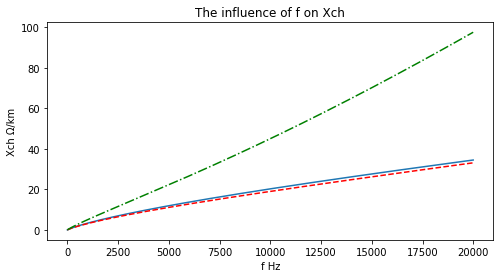

In [28]:
def draw_X(fch):
    x=fch
    y1=Xch1[:,0]
    y2=Xch1[:,1]
    y3=Xch1[:,2]
    y4=Xch1[:,3]
    y5=Xch1[:,4]
    y6=Xch1[:,5]

    plt.xlabel('f Hz')
    plt.ylabel('Xch Ω/km')
    plt.title('The influence of f on Xch')
    X1=plt.plot(x,y1)
    X2=plt.plot(x,y2,color='red',ls='--')
    X3=plt.plot(x,y3,color='green',ls='-.')
#     X4=plt.plot(x,y4,color='blue')
#     X5=plt.plot(x,y5,color='orange',ls='--')
#     X6=plt.plot(x,y6,color='purple',ls='-.')
#    return X1,X2,X3,X4,X5,X6
    return X1,X2,X3
x1=fch
X1,X2,X3=draw_X(fch)
plt.show()

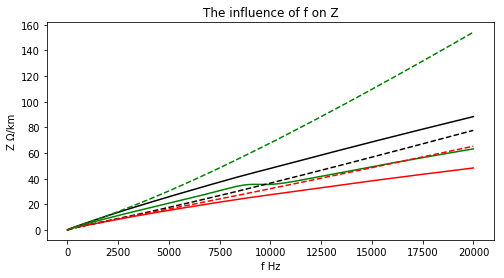

In [29]:
def draw_Z(fch):
    x=fch
    y1=Zch[:,0]
    y2=Zch[:,1]
    y3=Zch[:,2]
    y4=Zch1[:,0]
    y5=Zch1[:,1]
    y6=Zch1[:,2]
    

    plt.xlabel('f Hz')
    plt.ylabel('Z Ω/km')
    plt.title('The influence of f on Z')

    plt.rcParams['figure.figsize']=(8.0,4.0)


    Z1=plt.plot(x,y1,color='black')
    Z2=plt.plot(x,y2,color='red')
    Z3=plt.plot(x,y3,color='green')
    Zch2=plt.plot(x,y4,color='black',ls='--')
    Zch3=plt.plot(x,y5,color='red',ls='--')
    Zch4=plt.plot(x,y6,color='green',ls='--')

    return Z1,Z2,Z3,Zch2,Zch3,Zch4


Z1,Z2,Z3,Zch2,Zch3,Zch4=draw_Z(x1)

plt.show()